# Introduction
Machine learning competitions are a great way to improve your data science skills and measure your progress. 

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to improve and see how you stack up to others taking this course.

The link to the competition is https://www.kaggle.com/c/home-data-for-ml-course/overview

A tutorial on this competition I am following: https://www.kaggle.com/cheesu/house-prices-1st-approach-to-data-science-process

In [103]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

iowa_file_path = 'train.csv'

home_data = pd.read_csv(iowa_file_path, index_col=0)

# Understanding the Data

In [104]:
home_data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
649,60,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,2Story,6,5,1966,1966,Gable,CompShg,MetalSd,MetalSd,BrkFace,351.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,756,756,GasA,TA,Y,SBrkr,1051,788,0,1839,0,0,1,1,4,1,TA,7,Typ,1,TA,Attchd,1966.0,Unf,2,442,TA,TA,Y,0,124,216,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,155000
472,60,RL,92.0,11952,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosA,Norm,1Fam,2Story,7,6,1977,1977,Mansard,WdShake,WdShing,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,808,808,GasA,TA,Y,SBrkr,1161,808,0,1969,0,0,2,1,3,1,TA,8,Typ,1,Gd,Attchd,1977.0,RFn,2,534,TA,TA,Y,0,0,0,0,276,0,NaN,NaN,NaN,0,11,2007,WD,Normal,190000
1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
150,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1936,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,Gd,Y,FuseA,896,448,0,1344,0,0,1,0,3,1,TA,7,Typ,0,NaN,Detchd,1936.0,Unf,1,240,Fa,TA,Y,200,114,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1091,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1987.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,92900


In [105]:
home_data.select_dtypes(exclude="object").describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [106]:
home_data.select_dtypes(include="object").describe().round(decimals=2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Destribution of SalePrice

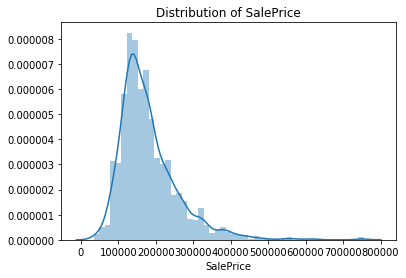

In [107]:
target = home_data.SalePrice
plt.figure()
sns.distplot(target)
plt.title("Distribution of SalePrice")
plt.show()

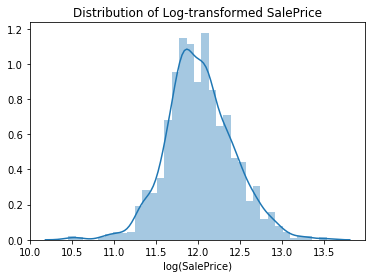

In [108]:
sns.distplot(np.log(target))
plt.title("Distribution of Log-transformed SalePrice")
plt.xlabel("log(SalePrice)")
plt.show()

## Destributions of Attributes

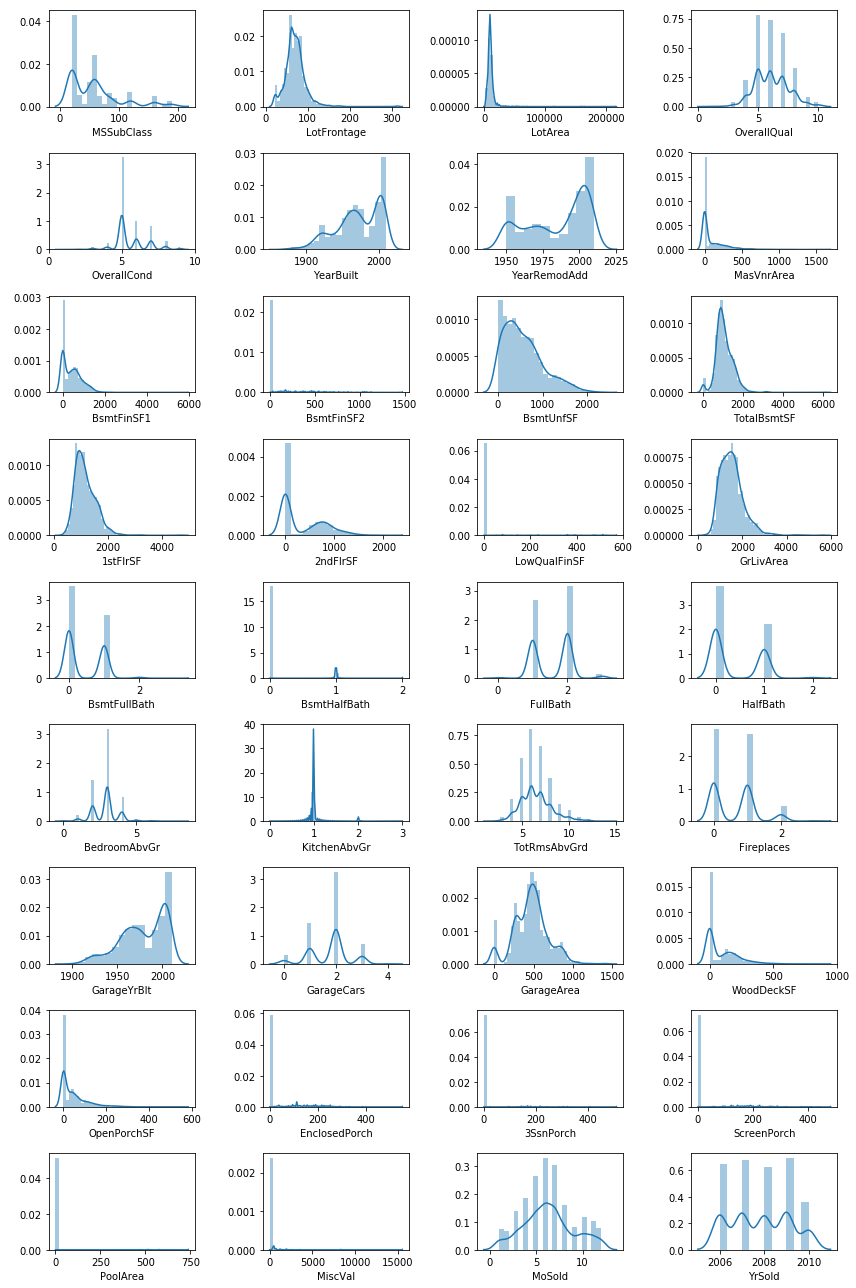

In [109]:
num_attributes = home_data.select_dtypes(exclude="object").drop("SalePrice", axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

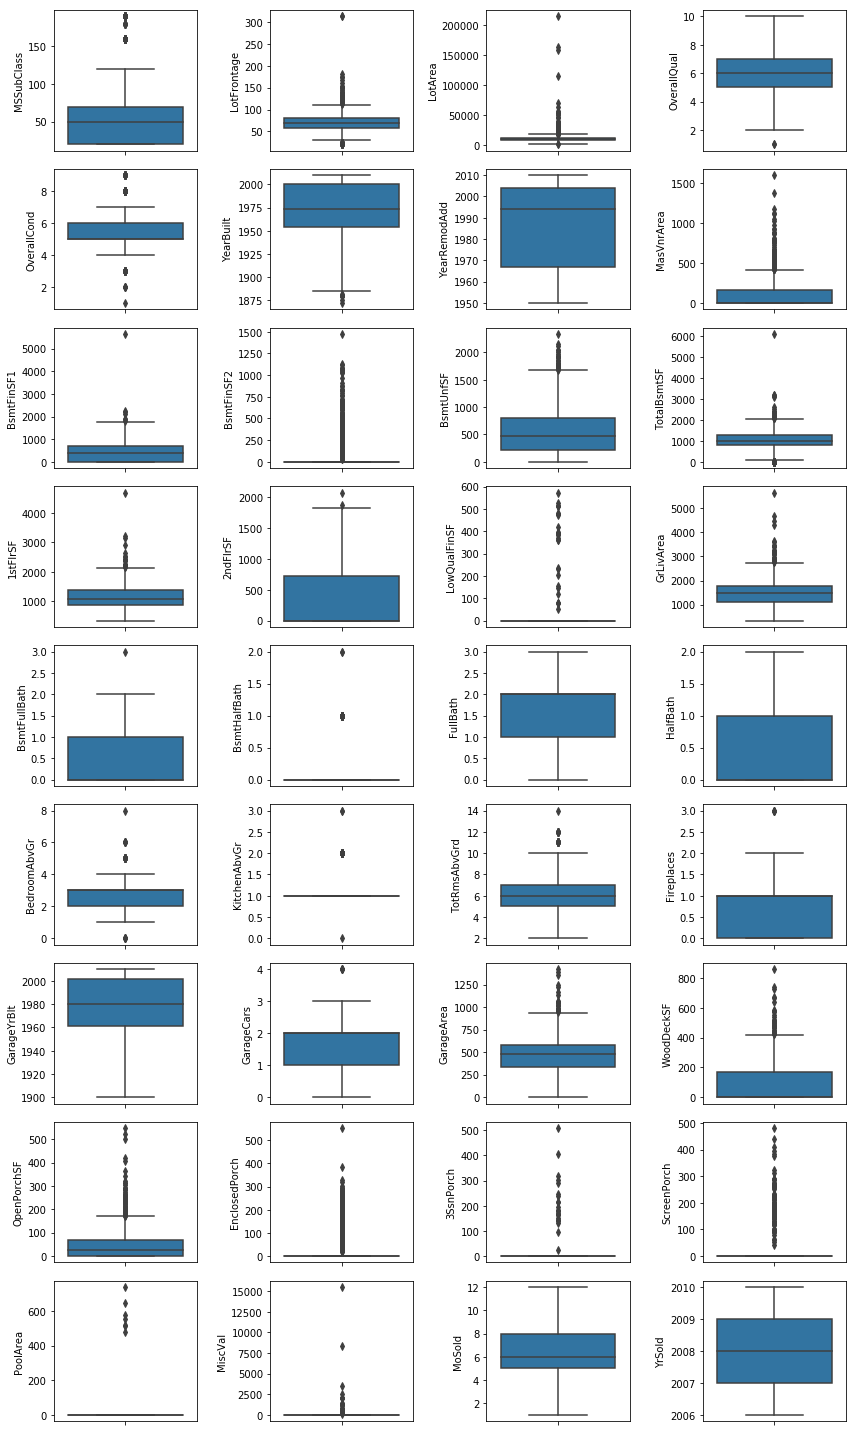

In [110]:
fig = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

## Correlation

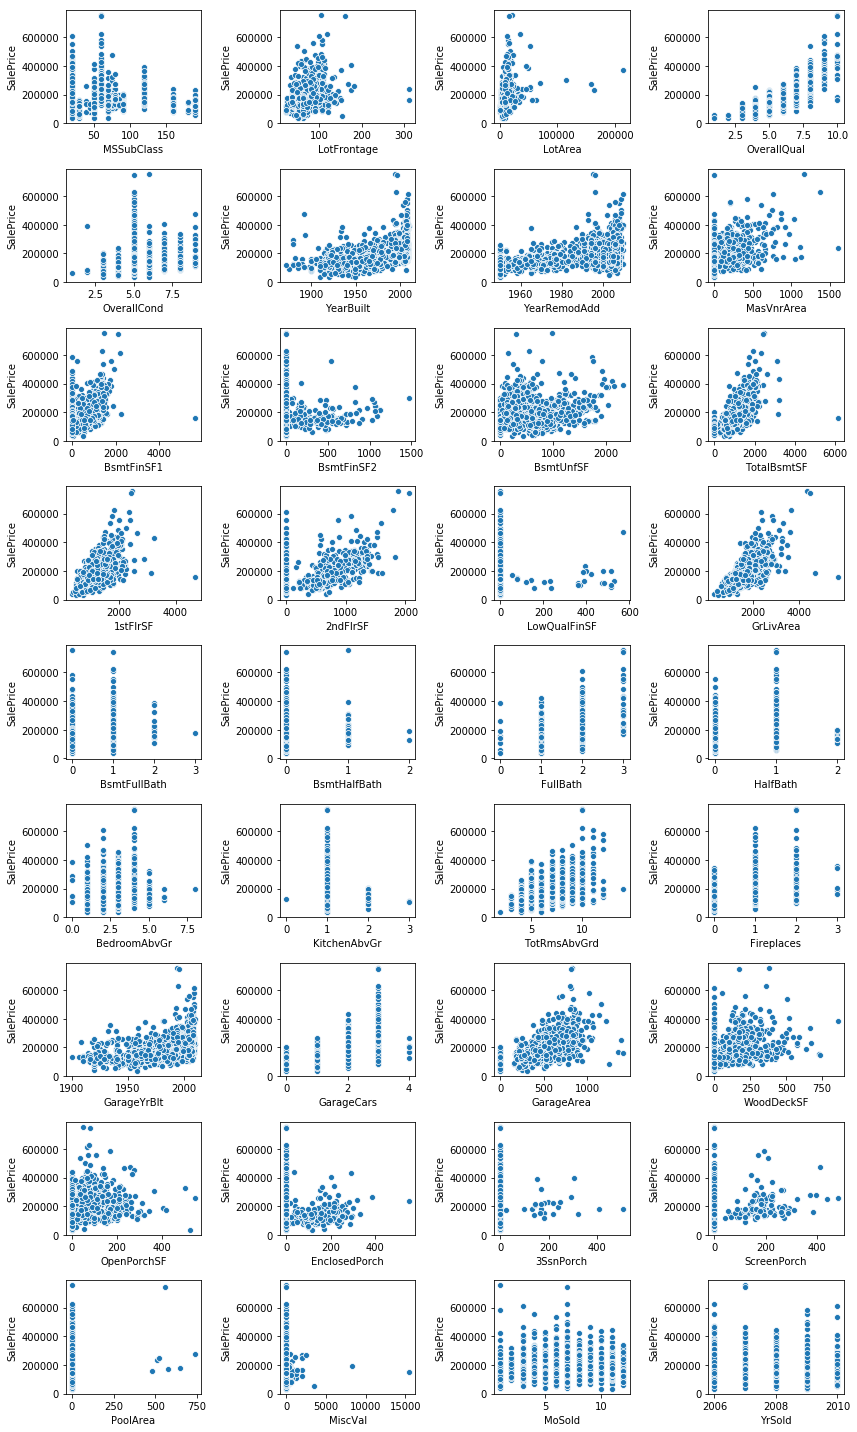

In [111]:
fig = plt.figure(figsize=(12,20))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)

plt.tight_layout()
plt.show()

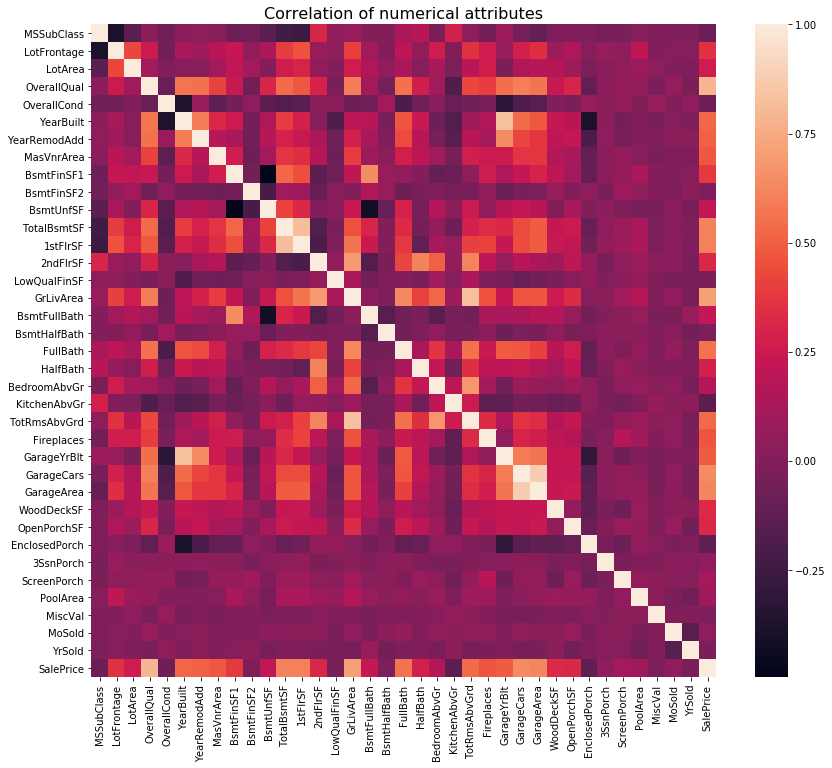

In [112]:
correlation = home_data.corr()

plt.figure(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [113]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [114]:
home_data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

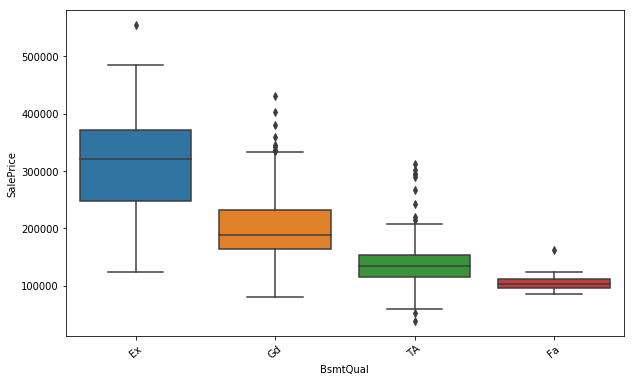

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=home_data.sample(500))
plt.xticks(rotation=40)

# Select Features

In [116]:
y = home_data.SalePrice
old_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotalBsmtSF', 
                'GarageCars', 'OverallCond', 'OverallQual','KitchenQual', 'Neighborhood', 
                'CentralAir', 'LowQualFinSF', 'Condition2']
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
            'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 
            'BsmtFinSF1', 'Neighborhood', 'KitchenQual', 'BsmtQual', 'ExterQual']

X = home_data[features]
X_onehot = pd.get_dummies(home_data[features])
X_imputed = SimpleImputer().fit_transform(X_onehot)

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

numerical_cols = list(train_X.columns[train_X.dtypes=='int64'])
categorical_cols = list(train_X.columns[train_X.dtypes=='object'])

# Partial Dependence Plots

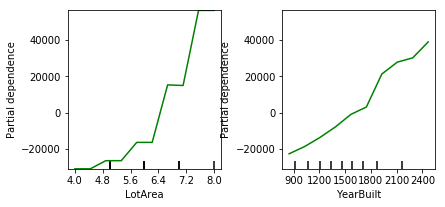

In [117]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

gb_model = GradientBoostingRegressor()
gb_model.fit(X_imputed,y)
my_plots = plot_partial_dependence(gb_model, features=[0,1], X=X_imputed,
                                   feature_names=['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                                                  'TotalBsmtSF', 'GarageCars', 'OverallCond', 'OverallQual', 
                                                  'Neighborhood', 'CentralAir'], grid_resolution=10)

# Pipeline And Cross Validation

In [118]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), 
                                               ('obj', categorical_transformer, categorical_cols)])

xg_model = XGBRegressor(n_estimators=300, learning_rate=0.1)
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('xg_model', xg_model)])

xg_pipeline.fit(train_X, train_y)
xg_predictions = xg_pipeline.predict(val_X)
xg_val_mae = mean_absolute_error(xg_predictions, val_y)
print("MAE for XGBoost with Train Test Tplit: {:,.0f}".format(xg_val_mae))

MAE_scores = cross_val_score(xg_pipeline, X, y, scoring='neg_mean_absolute_error')
print('MAE for XGBoost with Cross Validation %2f' %(-1 * MAE_scores.mean()))

MSE_scores = cross_val_score(xg_pipeline, X, y, scoring='neg_mean_squared_error')
print('RMSE for XGBoost with Cross Validation %2f' %(np.sqrt(-1 * MSE_scores)).mean())

[14:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE for XGBoost with Train Test Tplit: 16,054
[14:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE for XGBoost with Cross Validation 16854.322333
[14:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for XGBoost with Cross Validation 27606.748939


# Compare Different Models with Train Test Split

In [119]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=1)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('dt_model', dt_model)])
dt_pipeline.fit(train_X, train_y)
dt_val_predictions = dt_pipeline.predict(val_X)
dt_val_mae = mean_absolute_error(dt_val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(dt_val_mae))


# Decision Tree with max leaf nodes specified
dt2_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
dt2_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('dt2_model', dt2_model)])
dt2_pipeline.fit(train_X, train_y)
dt2_val_predictions = dt2_pipeline.predict(val_X)
dt2_val_mae = mean_absolute_error(dt2_val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(dt2_val_mae))


# Random Forest
rf_model = RandomForestRegressor(random_state=1)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('rf_model', rf_model)])
rf_pipeline.fit(train_X, train_y)
rf_val_predictions = rf_pipeline.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=1)
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('gb_model', gb_model)])
gb_pipeline.fit(train_X, train_y)
gb_val_predictions = gb_pipeline.predict(val_X)
gb_val_mae = mean_absolute_error(gb_val_predictions, val_y)
print("Validation MAE for Gradient Boosting: {:,.0f}".format(gb_val_mae))

Validation MAE when not specifying max_leaf_nodes: 25,566
Validation MAE for best value of max_leaf_nodes: 24,229
Validation MAE for Random Forest Model: 17,326
Validation MAE for Gradient Boosting: 16,718


# Align Training and Test Sets

In [122]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

final_train, final_test = X.align(test_data[features], join='inner', axis=1)

# Make Predictions

In [123]:
xg_full_model = XGBRegressor(n_estimators=300, learning_rate=0.1)
xg_full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('xg_full_model', xg_full_model)])
xg_full_pipeline.fit(final_train, y)
test_preds = xg_full_pipeline.predict(final_test)

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})

output.to_csv('submission.csv', index=False)

[14:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
